In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qctrlvisualizer as qv
import boulderopal as bo
import pickle

with open('Rabi50_noNN_resultz.pickle', 'rb') as handle:
    noNN = pickle.load(handle)

with open('Rabi50_resultz.pickle', 'rb') as handle:
    CCZz = pickle.load(handle)

plt.style.use(qv.get_qctrl_style())
controls_for_plots = lambda opt: {
    '$\\Delta$': opt['output']['delta'],
    '$\\Omega$': opt['output']['omega'],
    '$\\Phi$': opt['output']['phi']
}

# Dictionary for 27x27 Hamiltonian indexing

Hidx27 ={}
Hidx27['000'] = 0
Hidx27['100'] = 1
Hidx27['r00'] = 2
Hidx27['001'] = 3
Hidx27['00r'] = 4
Hidx27['101'] = 5
Hidx27['r01'] = 6
Hidx27['10r'] = 7
Hidx27['r0r'] = 8
Hidx27['010'] = 9
Hidx27['0r0'] = 10
Hidx27['110'] = 11
Hidx27['1r0'] = 12
Hidx27['r10'] = 13
Hidx27['rr0'] = 14
Hidx27['011'] = 15
Hidx27['0r1'] = 16
Hidx27['01r'] = 17
Hidx27['0rr'] = 18
Hidx27['111'] = 19
Hidx27['1r1'] = 20
Hidx27['r11'] = 21
Hidx27['11r'] = 22
Hidx27['r1r'] = 23
Hidx27['rr1'] = 24
Hidx27['1rr'] = 25
Hidx27['rrr'] = 26


# Components for the CCZ operator.
cz_0 = np.zeros(27)
cz_0[0] = 1
cz_0 = np.diag(cz_0)

cz_1 = np.zeros(27)
cz_1[[Hidx27['100'],Hidx27['010'],Hidx27['001']]] = 1
cz_1 = np.diag(cz_1)

cz_11 = np.zeros(27)
cz_11[[Hidx27['110'],Hidx27['101'],Hidx27['011']]] = 1
cz_11 = np.diag(cz_11)

cz_111 = np.zeros(27)
cz_111[Hidx27['111']] = 1
cz_111 = np.diag(cz_111)    

def pulse_pop(pulse,title):
    tau =  1 # * 1e-6 # s  *** use 1 when optimizing duration
    sample_times = np.linspace(0, tau, 200)

    u = pulse['output']['unitary']['value']
    psi0 = np.zeros(27)
    psi0[Hidx27['000']] = 1
    out0 = np.abs(np.transpose(psi0) @ u @ psi0)**2
    psi1 = np.zeros(27)
    psi1[Hidx27['100']] = 1
    out1 = np.abs(np.transpose(psi1) @ u @ psi1)**2
    psi11 = np.zeros(27)
    psi11[Hidx27['101']] = 1
    out11 = np.abs(np.transpose(psi11) @ u @ psi11)**2
    psi111 = np.zeros(27)
    psi111[Hidx27['111']] = 1
    out111 = np.abs(np.transpose(psi111) @ u @ psi111)**2
    plt.plot(1e9 * sample_times, out0)
    plt.plot(1e9 * sample_times, out1)
    plt.plot(1e9 * sample_times, out11)
    plt.plot(1e9 * sample_times, out111)
    plt.xlabel('Time (ns)')
    plt.ylabel('Population')
    plt.legend(['|0>','|1>','|11>','|111>'])
    plt.title(title)
    return plt.show()

Boulder Opal client update available.
Latest version is 2.0.0, you have 1.3.2.
Visit https://docs.q-ctrl.com/boulder-opal/changelog for the latest product updates.


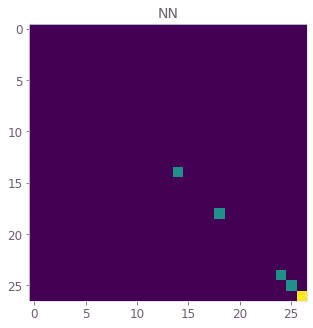

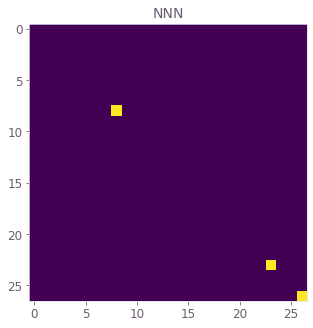

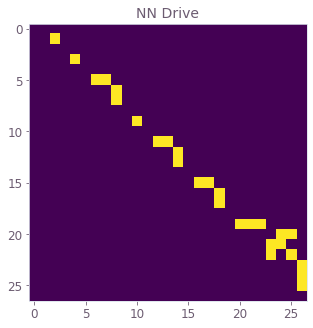

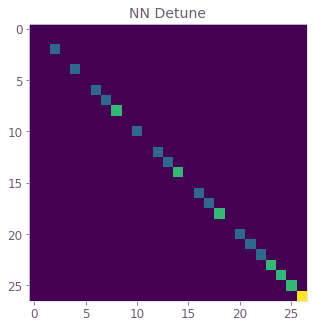

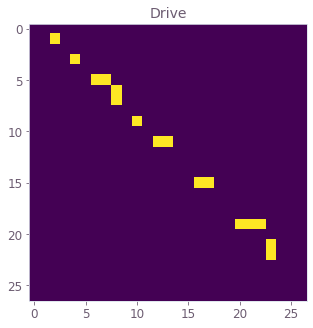

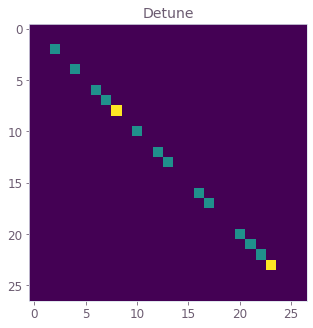

In [2]:
# All A* terms handled by hermitian_part call later and not encoded here
# NN Hamiltonian
drive_operator = np.zeros((27, 27))
detuneDiag = np.zeros(27)
drive_operator[Hidx27['100'], Hidx27['r00']] = 1
detuneDiag[Hidx27['r00']] = 1
drive_operator[Hidx27['001'], Hidx27['00r']] = 1
detuneDiag[Hidx27['00r']] = 1
drive_operator[Hidx27['101'], Hidx27['r01']] = 1
drive_operator[Hidx27['101'], Hidx27['10r']] = 1
drive_operator[Hidx27['r01'], Hidx27['r0r']] = 1
detuneDiag[Hidx27['r01']] = 1
drive_operator[Hidx27['10r'], Hidx27['r0r']] = 1
detuneDiag[Hidx27['10r']] = 1
detuneDiag[Hidx27['r0r']] = 2
drive_operator[Hidx27['010'], Hidx27['0r0']] = 1
detuneDiag[Hidx27['0r0']] = 1
drive_operator[Hidx27['110'], Hidx27['r10']] = 1
drive_operator[Hidx27['110'], Hidx27['1r0']] = 1
drive_operator[Hidx27['1r0'], Hidx27['rr0']] = 1
detuneDiag[Hidx27['1r0']] = 1
drive_operator[Hidx27['r10'], Hidx27['rr0']] = 1
detuneDiag[Hidx27['r10']] = 1
detuneDiag[Hidx27['rr0']] = 2
drive_operator[Hidx27['011'], Hidx27['0r1']] = 1
drive_operator[Hidx27['011'], Hidx27['01r']] = 1
drive_operator[Hidx27['0r1'], Hidx27['0rr']] = 1
detuneDiag[Hidx27['0r1']] = 1
drive_operator[Hidx27['01r'], Hidx27['0rr']] = 1
detuneDiag[Hidx27['01r']] = 1
detuneDiag[Hidx27['0rr']] = 2
drive_operator[Hidx27['111'], Hidx27['r11']] = 1
drive_operator[Hidx27['111'], Hidx27['1r1']] = 1
drive_operator[Hidx27['111'], Hidx27['11r']] = 1
drive_operator[Hidx27['1r1'], Hidx27['rr1']] = 1
drive_operator[Hidx27['1r1'], Hidx27['1rr']] = 1
detuneDiag[Hidx27['1r1']] = 1
drive_operator[Hidx27['r11'], Hidx27['rr1']] = 1
drive_operator[Hidx27['r11'], Hidx27['r1r']] = 1
detuneDiag[Hidx27['r11']] = 1
drive_operator[Hidx27['11r'], Hidx27['r1r']] = 1
drive_operator[Hidx27['11r'], Hidx27['1rr']] = 1
detuneDiag[Hidx27['11r']] = 1
drive_operator[Hidx27['r1r'], Hidx27['rrr']] = 1
detuneDiag[Hidx27['r1r']] = 2
drive_operator[Hidx27['rr1'], Hidx27['rrr']] = 1
detuneDiag[Hidx27['rr1']] = 2
drive_operator[Hidx27['1rr'], Hidx27['rrr']] = 1
detuneDiag[Hidx27['1rr']] = 2
detuneDiag[Hidx27['rrr']] = 3

NN_detuning_operator = np.diag(detuneDiag)
NN_drive_operator=drive_operator
# Blockade interactions

Blockade = 50 * 2 * np.pi * 1e9 # 50 GHz * µm^6

# next nearest neighbor
blockN3 = np.zeros(27)
blockN3[[Hidx27['r0r'],Hidx27['r1r'],Hidx27['rrr']]] = Blockade
blockN3 = np.diag(blockN3)

# nearest neighbor
blockNN = np.zeros(27)
blockNN[[Hidx27['0rr'],Hidx27['1rr'],Hidx27['rr0'],Hidx27['rr1']]] = Blockade
blockNN[Hidx27['rrr']] = 2*Blockade
blockNN = np.diag(blockNN)
plt.imshow(blockNN)
plt.title("NN")
plt.show()
plt.imshow(blockN3)
plt.title("NNN")
plt.show()
plt.imshow(NN_drive_operator)
plt.title("NN Drive")
plt.show()
plt.imshow(NN_detuning_operator)
plt.title("NN Detune")
plt.show()

# NO NN terms
drive_operator = np.zeros((27, 27))
detuneDiag = np.zeros(27)
drive_operator[Hidx27['100'], Hidx27['r00']] = 1
detuneDiag[Hidx27['r00']] = 1
drive_operator[Hidx27['001'], Hidx27['00r']] = 1
detuneDiag[Hidx27['00r']] = 1
drive_operator[Hidx27['101'], Hidx27['r01']] = 1
drive_operator[Hidx27['101'], Hidx27['10r']] = 1
drive_operator[Hidx27['r01'], Hidx27['r0r']] = 1
detuneDiag[Hidx27['r01']] = 1
drive_operator[Hidx27['10r'], Hidx27['r0r']] = 1
detuneDiag[Hidx27['10r']] = 1
detuneDiag[Hidx27['r0r']] = 2
drive_operator[Hidx27['010'], Hidx27['0r0']] = 1
detuneDiag[Hidx27['0r0']] = 1
drive_operator[Hidx27['110'], Hidx27['r10']] = 1
drive_operator[Hidx27['110'], Hidx27['1r0']] = 1
detuneDiag[Hidx27['1r0']] = 1
detuneDiag[Hidx27['r10']] = 1
drive_operator[Hidx27['011'], Hidx27['0r1']] = 1
drive_operator[Hidx27['011'], Hidx27['01r']] = 1
detuneDiag[Hidx27['0r1']] = 1
detuneDiag[Hidx27['01r']] = 1
drive_operator[Hidx27['111'], Hidx27['r11']] = 1
drive_operator[Hidx27['111'], Hidx27['1r1']] = 1
drive_operator[Hidx27['111'], Hidx27['11r']] = 1
detuneDiag[Hidx27['1r1']] = 1
drive_operator[Hidx27['r11'], Hidx27['r1r']] = 1
detuneDiag[Hidx27['r11']] = 1
drive_operator[Hidx27['11r'], Hidx27['r1r']] = 1
detuneDiag[Hidx27['11r']] = 1
detuneDiag[Hidx27['r1r']] = 2
detuning_operator = np.diag(detuneDiag)

plt.imshow(drive_operator)
plt.title("Drive")
plt.show()
plt.imshow(detuning_operator)
plt.title("Detune")
plt.show()

In [3]:
def pulseGraph(pulse, rNoise=1, omegaNoise=1, deltaNoise=1, phiNoise=1, NN=False):
    graph = bo.Graph()
    omega = graph.pwc(
            values= pulse['output']['omega']['values'] * omegaNoise, 
            durations = pulse['output']['omega']['durations'], 
            name = 'omega')

    delta = graph.pwc(
        values=pulse['output']['delta']['values'] * deltaNoise,
        durations = pulse['output']['delta']['durations'], 
        name = 'delta')
    
    phi = graph.pwc(
        values=pulse['output']['phi']['values']* phiNoise,
        durations=pulse['output']['phi']['durations'],
        name = 'phi')

    # Real scalar signal representing the single qubit phase.
    psi = pulse['output']['psi']['value']

    # Define the Hamiltonian.
    if NN:
        r = pulse['output'].get('r',3)
        if type(r) != int:
            r = r['value']
        alpha = pulse['output'].get('alpha',6)
        if type(alpha) != int:
            alpha = alpha['value']
        r *= rNoise
        hamiltonian = (
            graph.hermitian_part(omega * graph.exp(1j * phi) * NN_drive_operator) + 
            delta * NN_detuning_operator + r**(-alpha)*(blockNN+blockN3/(2**alpha))
        )*pulse['output']['duration']['value']
    else:
        hamiltonian = (
        graph.hermitian_part(omega * graph.exp(1j * phi) * drive_operator) + 
        delta * detuning_operator )*pulse['output']['duration']['value']


    # Define the target operator.
    target = graph.target(
            operator = (cz_0 +
                graph.exp(1j * psi) * cz_1 + 
                graph.exp(1j * 2 * psi) * cz_11 + 
                graph.exp(1j * (3 * psi + np.pi)) * cz_111 ))

    # Unitary time evolution.
    unitary = (
        graph.time_evolution_operators_pwc(
            hamiltonian = hamiltonian, 
            sample_times = np.linspace(0, 1, 200)
, 
            name = 'unitary'
        )
    )

    # Infidelity.
    infidelity = (
        graph.infidelity_pwc(
            hamiltonian = hamiltonian,
            target = target,
            name = 'infidelity'
        )
    )

    # Cost function.
    cost_function = (
        graph.sum(
            infidelity
        )
    )
    cost_function.name = 'cost_function'
    
    return graph

def rerun(pulse, rNoise=1, omegaNoise=1, deltaNoise=1, phiNoise=1,NN=False):
    result = (
        bo.execute_graph(
            graph = pulseGraph(pulse, rNoise, omegaNoise, deltaNoise, phiNoise, NN),
            output_node_names = [ 
                'unitary',
                'infidelity'
            ]
        )
    )
    return result

In [ ]:
# for i in range(len(pulse['output']['omega']['values'])):
#         omegaz.append(graph.pwc_signal(
#                 values= np.ndarray(pulse['output']['omega']['values'][i]), 
#                 duration = pulse['output']['omega']['durations'][i], 
#                 name = 'omega'+str(i)))
#     omega = graph.time_concatenate_pwc(omegaz, name="omega")
    
#     for i in range(len(pulse['output']['delta']['values'])):
#         deltaz.append(graph.pwc_signal(
#             values=np.ndarray(pulse['output']['delta']['values'][i]),
#             duration = pulse['output']['delta']['durations'][i], 
#             name = 'delta'+str(i)))
#     delta = graph.time_concatenate_pwc(deltaz, name="delta")
    
#     for i in range(len(pulse['output']['phi']['values'])):
#         phiz.append(graph.pwc_signal(
#             values=np.ndarray(pulse['output']['phi']['values'][i]),
#             duration=pulse['output']['phi']['durations'][i],
#             name = 'phi'+str(i)))
#     phi = graph.time_concatenate_pwc(phiz, name="phi")
    

In [4]:
HiFiPulseIDX = [0,69420]
HiFiPulseIDX_noNN = [0,69420]

for i in CCZz:
    if CCZz[i][0] < HiFiPulseIDX[1]:
        HiFiPulseIDX = [i, CCZz[i][0]]

for i in noNN:
    if noNN[i][0] < HiFiPulseIDX_noNN[1]:
        HiFiPulseIDX_noNN = [i, noNN[i][0]]

HiFiPulse = CCZz[HiFiPulseIDX[0]][1]
HiFiPulse_noNN = noNN[HiFiPulseIDX_noNN[0]][1]


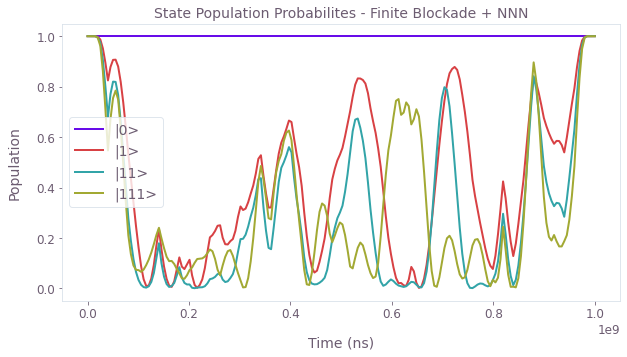

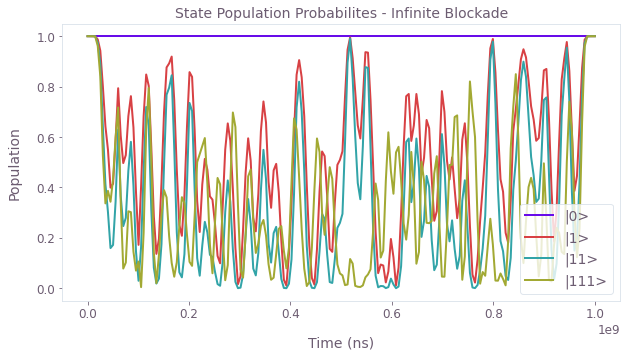

In [5]:
pulse_pop(HiFiPulse,"State Population Probabilites - Finite Blockade + NNN")
pulse_pop(HiFiPulse_noNN,"State Population Probabilites - Infinite Blockade")

In [ ]:
testrun = rerun(HiFiPulse,NN=True)
testrun['output']['infidelity']


In [ ]:
# a = np.linspace(-.05, -.01, 100)
# b = np.linspace(-.01, 0, 50)
# d = np.linspace(0, .01, 50)
# e = np.linspace(.01, .05, 100)
# d_offsets = np.concatenate((a,b,d,e))

# #d_offsets = np.linspace(-.05, .05, 201)
# offsetInfz = []
# for offset in d_offsets:
#     offsetInfz.append(rerun(HiFiPulse,1+offset,NN=True)['output']['infidelity']['value'])
# # Plotting Results
# plt.xlabel("% Offset from Ideal Atom Distance")
# plt.ylabel("Infidelity")
# plt.yscale("log")
# plt.plot(100 * d_offsets, offsetInfz, zorder=0)#, label='Simulated Data')
# plt.title(f"Infidelity as a Function of Atom Distance Offset \n\n Distance: {HiFiPulse['output']['r']['value']:.2} µm")

# plt.savefig('distanceRobustv3.png',dpi=300,bbox_inches='tight')


In [8]:
a = np.linspace(-.1, -.02, 100)
b = np.linspace(-.02, 0, 50)
d = np.linspace(0, .02, 50)
e = np.linspace(.02, .1, 100)
omega_offsets = np.concatenate((a,b,d,e))

omegaInfz = []
for offset in omega_offsets:
    omegaInfz.append(rerun(HiFiPulse_noNN,omegaNoise=1+offset,NN=False)['output']['infidelity']['value'])


Your task (action_id="2002745") has started.
Your task (action_id="2002745") has completed.
Your task (action_id="2002746") has started.
Your task (action_id="2002746") has completed.
Your task (action_id="2002747") has started.
Your task (action_id="2002747") has completed.
Your task (action_id="2002748") has started.
Your task (action_id="2002748") has completed.
Your task (action_id="2002749") has started.
Your task (action_id="2002749") has completed.
Your task (action_id="2002750") has started.
Your task (action_id="2002750") has completed.
Your task (action_id="2002751") has started.
Your task (action_id="2002751") has completed.
Your task (action_id="2002752") has started.
Your task (action_id="2002752") has completed.
Your task (action_id="2002753") has started.
Your task (action_id="2002753") has completed.
Your task (action_id="2002754") has started.
Your task (action_id="2002754") has completed.
Your task (action_id="2002755") has started.
Your task (action_id="2002755") has

In [10]:
a = np.linspace(-.1, -.02, 100)
b = np.linspace(-.02, 0, 50)
d = np.linspace(0, .02, 50)
e = np.linspace(.02, .1, 100)
delta_offsets = np.concatenate((a,b,d,e))

deltaInfz = []
for offset in delta_offsets:
    deltaInfz.append(rerun(HiFiPulse_noNN,deltaNoise=1+offset,NN=False)['output']['infidelity']['value'])


Your task (action_id="2003045") has started.
Your task (action_id="2003045") has completed.
Your task (action_id="2003046") has started.
Your task (action_id="2003046") has completed.
Your task (action_id="2003047") has started.
Your task (action_id="2003047") has completed.
Your task (action_id="2003048") has started.
Your task (action_id="2003048") has completed.
Your task (action_id="2003049") has started.
Your task (action_id="2003049") has completed.
Your task (action_id="2003050") has started.
Your task (action_id="2003050") has completed.
Your task (action_id="2003051") has started.
Your task (action_id="2003051") has completed.
Your task (action_id="2003052") has started.
Your task (action_id="2003052") has completed.
Your task (action_id="2003053") has started.
Your task (action_id="2003053") has completed.
Your task (action_id="2003054") has started.
Your task (action_id="2003054") has completed.
Your task (action_id="2003055") has started.
Your task (action_id="2003055") has

In [12]:
a = np.linspace(-.1, -.02, 100)
b = np.linspace(-.02, 0, 50)
d = np.linspace(0, .02, 50)
e = np.linspace(.02, .1, 100)
phi_offsets = np.concatenate((a,b,d,e))

phiInfz = []
for offset in phi_offsets:
    phiInfz.append(rerun(HiFiPulse_noNN,phiNoise=1+offset,NN=False)['output']['infidelity']['value'])


Your task (action_id="2003345") has started.
Your task (action_id="2003345") has completed.
Your task (action_id="2003346") has started.
Your task (action_id="2003346") has completed.
Your task (action_id="2003347") has started.
Your task (action_id="2003347") has completed.
Your task (action_id="2003348") has started.
Your task (action_id="2003348") has completed.
Your task (action_id="2003349") has started.
Your task (action_id="2003349") has completed.
Your task (action_id="2003350") has started.
Your task (action_id="2003350") has completed.
Your task (action_id="2003351") has started.
Your task (action_id="2003351") has completed.
Your task (action_id="2003352") has started.
Your task (action_id="2003352") has completed.
Your task (action_id="2003353") has started.
Your task (action_id="2003353") has completed.
Your task (action_id="2003354") has started.
Your task (action_id="2003354") has completed.
Your task (action_id="2003355") has started.
Your task (action_id="2003355") has

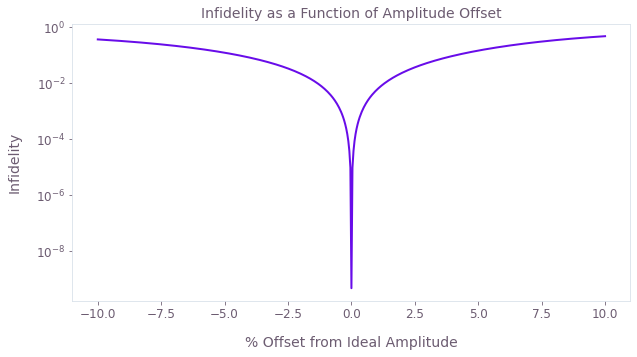

In [9]:
   # Plotting Results
plt.xlabel("% Offset from Ideal Amplitude")
plt.ylabel("Infidelity")
plt.yscale("log")
plt.plot(100 * omega_offsets, omegaInfz, zorder=0)#, label='Simulated Data')
plt.title("Infidelity as a Function of Amplitude Offset")

plt.savefig('omegaRobustnoNN.png',dpi=300,bbox_inches='tight')


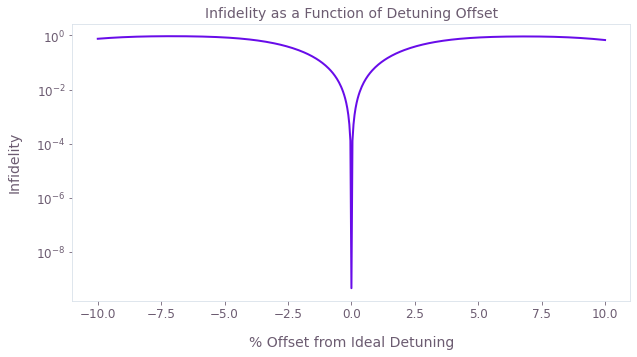

In [11]:
   # Plotting Results
plt.xlabel("% Offset from Ideal Detuning")
plt.ylabel("Infidelity")
plt.yscale("log")
plt.plot(100 * delta_offsets, deltaInfz, zorder=0)#, label='Simulated Data')
plt.title("Infidelity as a Function of Detuning Offset")

plt.savefig('deltaRobustnoNN.png',dpi=300,bbox_inches='tight')


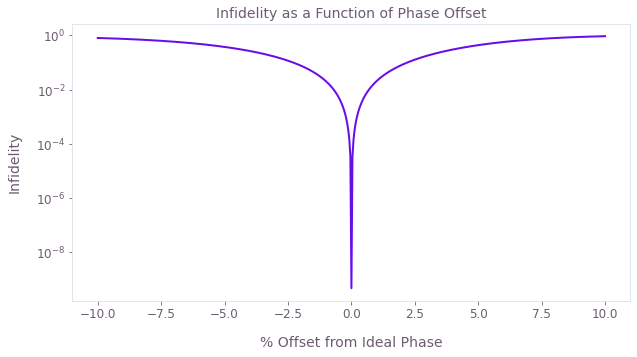

In [13]:
   # Plotting Results
plt.xlabel("% Offset from Ideal Phase")
plt.ylabel("Infidelity")
plt.yscale("log")
plt.plot(100 * phi_offsets, phiInfz, zorder=0)#, label='Simulated Data')
plt.title("Infidelity as a Function of Phase Offset")

plt.savefig('phiRobustnoNN.png',dpi=300,bbox_inches='tight')
